In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from wordcloud import STOPWORDS

import os
for dirname, _, filenames in os.walk('Book'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Book/books_data.csv
Book/Books_rating.csv


In [4]:
books_data = pd.read_csv('Book/books_data.csv')
books_rating = pd.read_csv('Book/Books_rating.csv')

print(books_data.columns)
print(books_rating.columns)

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')
Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')


In [5]:
books_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [6]:
books_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [7]:
data = pd.merge(books_rating,books_data, on = 'Title')
data.shape

(3000000, 19)

In [8]:
# Extracting usefull columns for our analysis
data = data[['Title','review/score','review/text','authors','categories','ratingsCount']]

In [9]:
# Dropping Duplicates
data.drop_duplicates(inplace = True)
data.shape

(2617289, 6)

In [10]:
data.isna().sum()

Title               207
review/score          0
review/text           8
authors          350198
categories       465848
ratingsCount    1234897
dtype: int64

In [11]:
# Dropping Null Values
data.dropna(inplace = True)
data.isna().sum()

Title           0
review/score    0
review/text     0
authors         0
categories      0
ratingsCount    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1325891 entries, 47 to 2999999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Title         1325891 non-null  object 
 1   review/score  1325891 non-null  float64
 2   review/text   1325891 non-null  object 
 3   authors       1325891 non-null  object 
 4   categories    1325891 non-null  object 
 5   ratingsCount  1325891 non-null  float64
dtypes: float64(2), object(4)
memory usage: 70.8+ MB


In [13]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount
47,The Church of Christ: A Biblical Ecclesiology ...,5.0,With the publication of Everett Ferguson's boo...,['Everett Ferguson'],['Religion'],5.0
48,The Church of Christ: A Biblical Ecclesiology ...,5.0,Everett Ferguson approaches the subject of ear...,['Everett Ferguson'],['Religion'],5.0
49,The Church of Christ: A Biblical Ecclesiology ...,4.0,This book is a continual resource. It is so bi...,['Everett Ferguson'],['Religion'],5.0
50,The Church of Christ: A Biblical Ecclesiology ...,4.0,This is a very useful and thorough text book. ...,['Everett Ferguson'],['Religion'],5.0
181,Voices from the Farm: Adventures in Community ...,5.0,"Ironically, I grew up in a small town close to...",['Rupert Fike'],['Biography & Autobiography'],1.0


In [14]:
# Using only the fraction of dataset to reduce the running time on big data
data = data.sample(50000)
data.shape

(50000, 6)

In [15]:
# Removes bractes and colons from authors name
data['authors'] = data['authors'].str.extract(r'\'(.*)\'')
# Removes bractes and colons from categories
data['categories'] = data['categories'].str.extract(r'\'(.*)\'')
# Counting the length of the each review
data['word_count'] = data['review/text'].apply(lambda x: len(x.split(' ')))

data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count
536405,Pride and Prejudice,5.0,A wonderful tale that shows the importance of ...,Jane Austen,Fiction,7.0,47
2606084,The Adventures of Max the Minnow (Eyeball Anim...,4.0,"I would give this book five stars, but the wig...",William Boniface,Juvenile Fiction,1.0,52
1272133,Dr. Abravanel's Body Type Diet & Lifetime Nutr...,2.0,I found this book very difficult to use. First...,"Elliot D. Abravanel', 'Elizabeth A. King",Health & Fitness,3.0,65
1514226,Gut Feelings: From Fear And Despair To Health ...,3.0,"As a person interested in WLS, this book helpe...","Carnie Wilson', 'Mick Kleber",Self-Help,1.0,117
942815,The Adventures of Huckleberry Finn (Courage Li...,5.0,Everyone should read or re-read this classic. ...,"Mark Twain', 'Marciano Guerrero",Fiction,3415.0,134


Sentiment Analysis

In [16]:
data['clean_reviews'] = data['review/text'].str.lower()
vader = SentimentIntensityAnalyzer()
data['score'] = data['clean_reviews'].apply(lambda review: vader.polarity_scores(review))
data['compound'] = data['score'].apply(lambda score_dict: score_dict['compound'])
data['Sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')

# New Feature: Review Length
data['review_length'] = data['clean_reviews'].apply(len)

In [17]:
# if compound value is more than 0.05 then it precive as positive
# if compound value is less than -0.0 then it precive as negative
# if compound value is equal to 0.0 then it precive as neutral

data['Sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count,clean_reviews,score,compound,Sentiment,review_length
536405,Pride and Prejudice,5.0,A wonderful tale that shows the importance of ...,Jane Austen,Fiction,7.0,47,a wonderful tale that shows the importance of ...,"{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp...",0.9524,positive,278
2606084,The Adventures of Max the Minnow (Eyeball Anim...,4.0,"I would give this book five stars, but the wig...",William Boniface,Juvenile Fiction,1.0,52,"i would give this book five stars, but the wig...","{'neg': 0.115, 'neu': 0.699, 'pos': 0.186, 'co...",0.5719,positive,270
1272133,Dr. Abravanel's Body Type Diet & Lifetime Nutr...,2.0,I found this book very difficult to use. First...,"Elliot D. Abravanel', 'Elizabeth A. King",Health & Fitness,3.0,65,i found this book very difficult to use. first...,"{'neg': 0.08, 'neu': 0.89, 'pos': 0.03, 'compo...",-0.5413,negative,335
1514226,Gut Feelings: From Fear And Despair To Health ...,3.0,"As a person interested in WLS, this book helpe...","Carnie Wilson', 'Mick Kleber",Self-Help,1.0,117,"as a person interested in wls, this book helpe...","{'neg': 0.055, 'neu': 0.849, 'pos': 0.097, 'co...",0.7530,positive,628
942815,The Adventures of Huckleberry Finn (Courage Li...,5.0,Everyone should read or re-read this classic. ...,"Mark Twain', 'Marciano Guerrero",Fiction,3415.0,134,everyone should read or re-read this classic. ...,"{'neg': 0.144, 'neu': 0.782, 'pos': 0.074, 'co...",-0.8697,negative,755


Sentiment Distribution Bar Chart

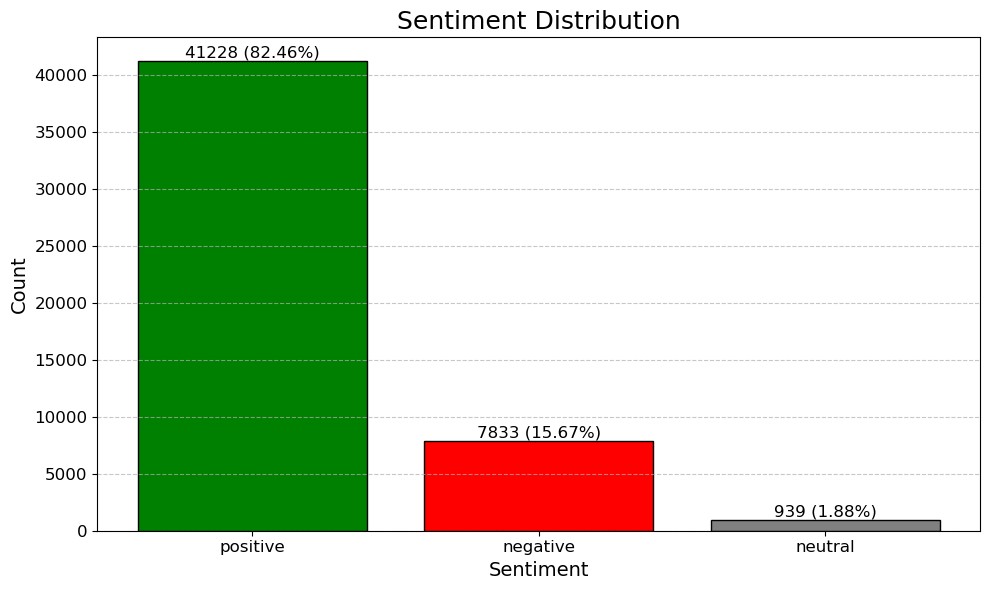

In [37]:
colors = ['green', 'red', 'gray']
sentiment_counts = data['Sentiment'].value_counts()

total_reviews = sentiment_counts.sum()
percentage = (sentiment_counts / total_reviews) * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors, edgecolor='black')

for bar, percent in zip(bars, percentage):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f'{yval} ({percent:.2f}%)', ha='center', va='bottom', fontsize=12)

plt.xticks(rotation='horizontal', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Sentiment Distribution', fontsize=18)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Word Cloud for Positive and Negative Sentiments

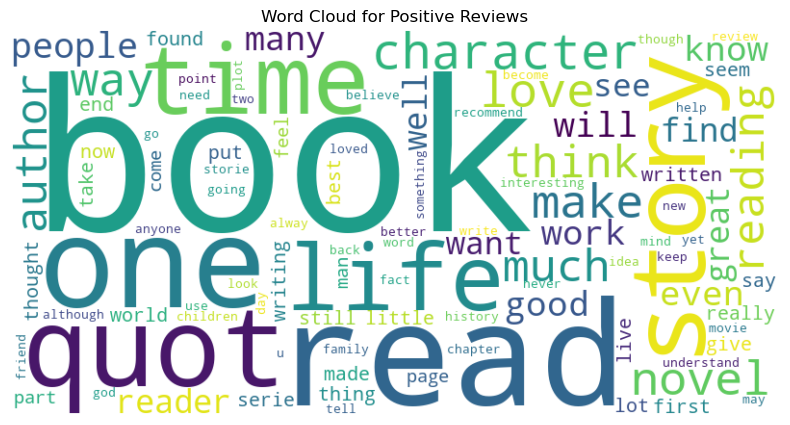

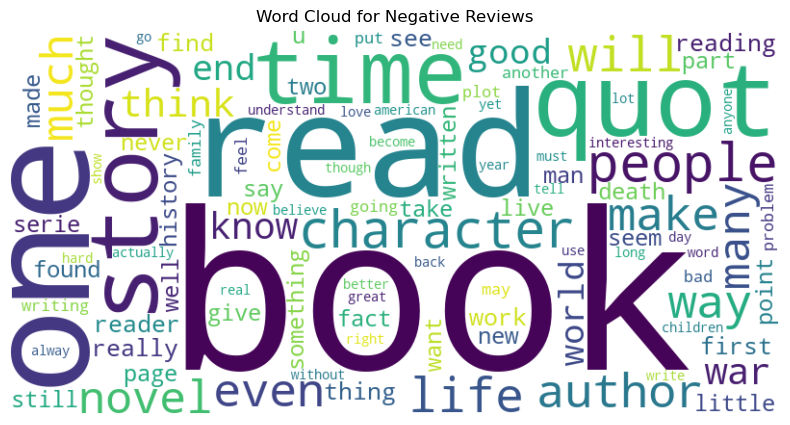

In [27]:
positive_reviews = ' '.join(data[data['Sentiment'] == 'positive']['clean_reviews'])
negative_reviews = ' '.join(data[data['Sentiment'] == 'negative']['clean_reviews'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

This word cloud visualizations for both positive and negative reviews showed a significant overlap of words.  This overlapping could potentially be misleading, as it didn't effectively differentiate the unique sentiments between the two categories.

To address this, I made some adjustments:

1.Keyword Extraction with TF-IDF: By utilizing TF-IDF, we weighted words based on their importance in the dataset.  This allowed us to capture the most significant keywords for both positive and negative sentiments without considering their high frequency across both groups.
Custom Stopword Removal: We integrated a custom list of stopwords to filter out common words that didn't contribute meaningful insights.  This helped further refine the unique words showcased in each cloud.

2.Unique Word Selection: We removed common words that appeared in both positive and negative keyword lists to ensure each cloud distinctly represented its sentiment.

3.The resulting word clouds now provide a clearer, more distinct visualization of the dominant words associated with each sentiment.

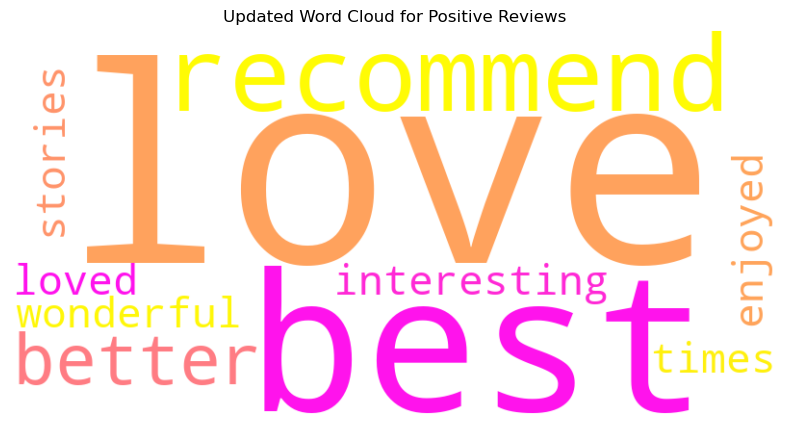

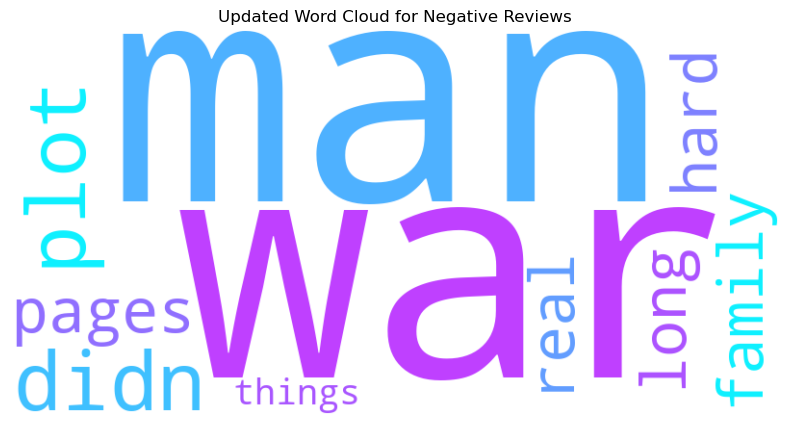

In [36]:
# Vectorize the reviews using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.85, max_features=100, stop_words='english')
tfidf_data = vectorizer.fit_transform(data['clean_reviews'])
features = vectorizer.get_feature_names_out()

# Score each feature's TF-IDF value
positive_scores = tfidf_data[data['Sentiment'] == 'positive'].sum(axis=0)
negative_scores = tfidf_data[data['Sentiment'] == 'negative'].sum(axis=0)

# Associate scores with features and sort them
positive_keywords = {features[i]: positive_scores[0, i] for i in range(len(features))}
negative_keywords = {features[i]: negative_scores[0, i] for i in range(len(features))}

positive_keywords = sorted(positive_keywords.items(), key=lambda x: x[1], reverse=True)[:50]
negative_keywords = sorted(negative_keywords.items(), key=lambda x: x[1], reverse=True)[:50]

# Extract keyword lists
positive_keylist = [key[0] for key in positive_keywords]
negative_keylist = [key[0] for key in negative_keywords]

# Remove overlapping words between the two lists
unique_positive_keywords = " ".join([word for word in positive_keylist if word not in negative_keylist])
unique_negative_keywords = " ".join([word for word in negative_keylist if word not in positive_keylist])

# Add some words to the STOPWORDS set that may not help the analysis much
additional_stopwords = set(["say", "ve", "like", "really", "one", "get", "go", "know", "thing", "much", "time"])
STOPWORDS.update(additional_stopwords)

# Change the color
positive_colormap = "spring"
negative_colormap = "cool"

# Update the word clouds
wordcloud_pos_updated = WordCloud(stopwords=STOPWORDS, width=800, height=400, background_color='white', colormap=positive_colormap).generate(unique_positive_keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos_updated, interpolation='bilinear')
plt.axis('off')
plt.title('Updated Word Cloud for Positive Reviews')
plt.show()

wordcloud_neg_updated = WordCloud(stopwords=STOPWORDS, width=800, height=400, background_color='white', colormap=negative_colormap).generate(unique_negative_keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg_updated, interpolation='bilinear')
plt.axis('off')
plt.title('Updated Word Cloud for Negative Reviews')
plt.show()


Scatter plot of Review Length vs. Sentiment Score

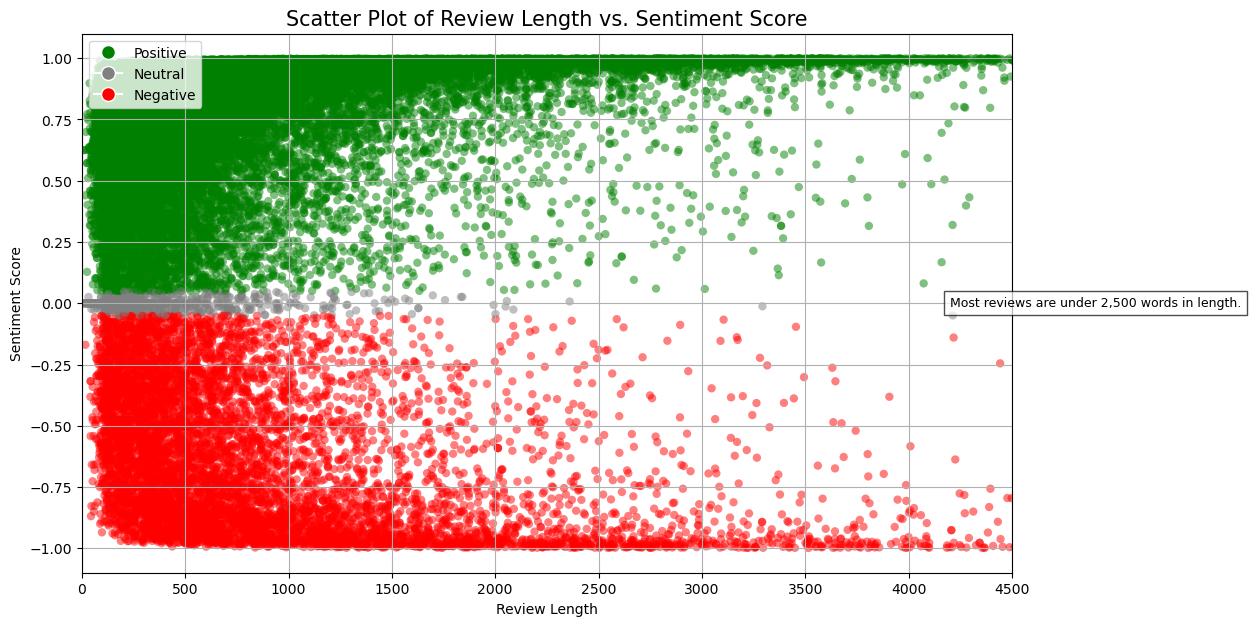

In [42]:
data['review_length'] = data['clean_reviews'].apply(len)

sentiment_colors = {'positive': 'green', 'negative': 'red', 'neutral': 'gray'}
colors = data['Sentiment'].map(sentiment_colors)

plt.figure(figsize=(12, 7))

# Scatter plot with specified transparency and restricted x-axis range
plt.scatter(data['review_length'], data['compound'], c=colors, alpha=0.5, edgecolors="none", label=colors)
plt.xlim(0, 4500)  # Adjusted the x-axis limit for space to display the text note

# Title, labels, and grid
plt.title('Scatter Plot of Review Length vs. Sentiment Score', fontsize=15)
plt.xlabel('Review Length')
plt.ylabel('Sentiment Score')
plt.grid(True)

# Adding a text note to the plot
plt.text(4200, 0, 'Most reviews are under 2,500 words in length.', 
         fontsize=9, ha='left', va='center', bbox=dict(facecolor='white', alpha=0.7))

# Creating custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=sentiment_colors['positive'], markersize=10, label='Positive'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=sentiment_colors['neutral'], markersize=10, label='Neutral'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=sentiment_colors['negative'], markersize=10, label='Negative')]

plt.legend(handles=legend_elements, loc="upper left")

plt.show()
